<a href="https://colab.research.google.com/github/bmatore/inft6201/blob/main/Data_Analysis_Report_Group_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})

plt.rcParams.update({'font.size': 20}) # Increase fontsize

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [22]:
df_accidents = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ny_accidents.csv", na_values='?')

Data Analysis

In [23]:
df_accidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39537 entries, 0 to 39536
Data columns (total 48 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             39537 non-null  int64  
 1   ID                     39537 non-null  object 
 2   Severity               39537 non-null  int64  
 3   Start_Time             39537 non-null  object 
 4   End_Time               39537 non-null  object 
 5   Start_Lat              39537 non-null  float64
 6   Start_Lng              39537 non-null  float64
 7   End_Lat                39537 non-null  float64
 8   End_Lng                39537 non-null  float64
 9   Distance.mi.           39537 non-null  float64
 10  Description            39537 non-null  object 
 11  Number                 11845 non-null  float64
 12  Street                 39537 non-null  object 
 13  Side                   39537 non-null  object 
 14  City                   39529 non-null  object 
 15  Co

In [24]:
df_accidents.describe()

,Unnamed: 0,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance.mi.,Number,Temperature.F.,Wind_Chill.F.,Humidity...,Pressure.in.,Visibility.mi.,Wind_Speed.mph.,Precipitation.in.
count,3.953700e+04,39537.000000,39537.000000,39537.000000,39537.000000,39537.000000,39537.000000,11845.000000,39147.000000,38074.000000,39137.000000,39162.000000,39131.000000,38349.000000,37594.000000
mean,7.543609e+05,2.282900,41.714567,-74.806364,41.715110,-74.806824,0.654307,2133.770030,51.915442,49.177806,65.716253,29.713701,9.040011,9.132535,0.005389
std,3.307301e+05,0.642619,1.065492,1.685198,1.065188,1.685823,1.551176,3428.535678,16.787521,19.667776,20.599997,0.399174,2.668705,5.870588,0.027952
min,2.373510e+05,1.000000,40.523980,-79.748951,40.524638,-79.761920,0.000000,1.000000,-12.000000,-30.400000,13.000000,27.550000,0.000000,0.000000,0.000000
25%,4.998200e+05,2.000000,40.772600,-76.049410,40.774311,-76.047636,0.000000,215.000000,39.900000,34.000000,49.000000,29.470000,10.000000,5.000000,0.000000
50%,7.266940e+05,2.000000,41.065783,-73.929060,41.068520,-73.929030,0.192000,857.000000,51.000000,51.000000,67.000000,29.740000,10.000000,8.000000,0.000000
75%,9.178200e+05,2.000000,42.989290,-73.781207,42.987950,-73.781337,0.687000,2451.000000,65.000000,65.000000,84.000000,29.990000,10.000000,13.000000,0.000000
max,1.515693e+06,4.000000,44.917460,-71.943680,44.981057,-71.943680,49.240000,52027.000000,96.000000,96.000000,100.000000,30.710000,20.000000,40.000000,0.830000


In [25]:
df_accidents.shape

(39537, 48)

In [26]:
df_accidents.isnull().sum()

Unnamed: 0                   0
ID                           0
Severity                     0
Start_Time                   0
End_Time                     0
Start_Lat                    0
Start_Lng                    0
End_Lat                      0
End_Lng                      0
Distance.mi.                 0
Description                  0
Number                   27692
Street                       0
Side                         0
City                         8
County                       0
State                        0
Zipcode                      0
Country                      0
Timezone                     0
Airport_Code                66
Weather_Timestamp          312
Temperature.F.             390
Wind_Chill.F.             1463
Humidity...                400
Pressure.in.               375
Visibility.mi.             406
Wind_Direction             939
Wind_Speed.mph.           1188
Precipitation.in.         1943
Weather_Condition          343
Amenity                      0
Bump    

In [20]:
#df_accidents = df_accidents.dropna()

In [27]:
df_accidents.shape

(39537, 48)

In [29]:
#seperate Start Date and End Date into Date and Time fields
df_accidents['Start_Date'] = pd.to_datetime(df_accidents['Start_Time']).dt.date
df_accidents['Start_Time'] = pd.to_datetime(df_accidents['Start_Time']).dt.time
df_accidents['End_Date'] = pd.to_datetime(df_accidents['End_Time']).dt.date
df_accidents['End_Time'] = pd.to_datetime(df_accidents['End_Time']).dt.time

In [30]:
df_accidents.head(5)

,Unnamed: 0,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance.mi.,Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature.F.,Wind_Chill.F.,Humidity...,Pressure.in.,Visibility.mi.,Wind_Direction,Wind_Speed.mph.,Precipitation.in.,Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Start_Date,End_Date
0,237351,A-2953957,2,20:52:00,22:17:27,43.119443,-75.293198,43.120291,-75.293547,0.061,Incident on ORISKANY BLVD near HOUSE 131 Expec...,102.0,Oriskany Blvd,R,Whitesboro,Oneida,NY,13492-1322,US,US/Eastern,KRME,2020-12-03 20:53:00,32.0,32.0,75.0,29.47,10.0,CALM,0.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night,2020-12-03,2020-12-03
1,237362,A-2953968,2,23:19:55,23:41:46,40.834883,-73.866244,40.833773,-73.863254,0.174,Queuing traffic in White Plains Rd exit [5A] d...,NaN,Cross Bronx Expy E,R,Bronx,Bronx,NY,10460,US,US/Eastern,KLGA,2020-09-25 22:51:00,70.0,70.0,76.0,30.08,10.0,SSW,7.0,0.0,Mostly Cloudy,False,False,True,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Night,2020-09-25,2020-09-25
2,237365,A-2953971,2,12:17:30,03:44:00,40.802117,-73.916498,40.804907,-73.911238,0.336,Stationary traffic on I-278 from 31st St/Hoyt ...,NaN,Bruckner Expy E,R,Bronx,Bronx,NY,10454,US,US/Eastern,KLGA,2020-10-15 11:51:00,71.0,71.0,51.0,29.98,10.0,S,16.0,0.0,Fair,False,False,False,False,True,False,False,False,False,True,False,False,False,Day,Day,Day,Day,2020-10-15,2020-10-16
3,237402,A-2954008,2,02:58:56,04:40:33,43.073669,-78.990615,43.075229,-78.990615,0.108,Crash right lane blocked on I-190 - Niagara Th...,NaN,North Grand Island Bridge,R,Niagara Falls,Niagara,NY,14304,US,US/Eastern,KIAG,2020-10-03 02:53:00,43.0,43.0,97.0,29.52,10.0,CALM,0.0,0.0,Partly Cloudy,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Night,2020-10-03,2020-10-03
4,237423,A-2954030,2,13:19:55,15:24:11,41.308840,-74.025331,41.307460,-74.027961,0.167,Incident on PALISADES INTERSTATE PKWY SB near ...,NaN,Palisades Interstate Pkwy S,R,Fort Montgomery,Orange,NY,10922,US,US/Eastern,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,True,False,False,False,False,False,False,False,False,Day,Day,Day,Day,2020-09-17,2020-09-17


In [31]:
df_accidents['Start_Hour'] = pd.to_datetime(df_accidents['Start_Time'], format='%H:%M:%S').dt.hour
df_accidents['End_Hour'] = pd.to_datetime(df_accidents['End_Time'], format='%H:%M:%S').dt.hour

In [34]:
df_accidents['Start_Month'] = pd.to_datetime(df_accidents['Start_Date']).dt.month
df_accidents['End_Month'] = pd.to_datetime(df_accidents['End_Date']).dt.month

In [41]:
df_accidents['City'].nunique()

830

In [32]:
df_accidents.head(2)

,Unnamed: 0,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance.mi.,Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature.F.,Wind_Chill.F.,Humidity...,Pressure.in.,Visibility.mi.,Wind_Direction,Wind_Speed.mph.,Precipitation.in.,Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Start_Date,End_Date,Start_Hour,End_Hour
0,237351,A-2953957,2,20:52:00,22:17:27,43.119443,-75.293198,43.120291,-75.293547,0.061,Incident on ORISKANY BLVD near HOUSE 131 Expec...,102.0,Oriskany Blvd,R,Whitesboro,Oneida,NY,13492-1322,US,US/Eastern,KRME,2020-12-03 20:53:00,32.0,32.0,75.0,29.47,10.0,CALM,0.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night,2020-12-03,2020-12-03,20,22
1,237362,A-2953968,2,23:19:55,23:41:46,40.834883,-73.866244,40.833773,-73.863254,0.174,Queuing traffic in White Plains Rd exit [5A] d...,NaN,Cross Bronx Expy E,R,Bronx,Bronx,NY,10460,US,US/Eastern,KLGA,2020-09-25 22:51:00,70.0,70.0,76.0,30.08,10.0,SSW,7.0,0.0,Mostly Cloudy,False,False,True,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Night,2020-09-25,2020-09-25,23,23


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


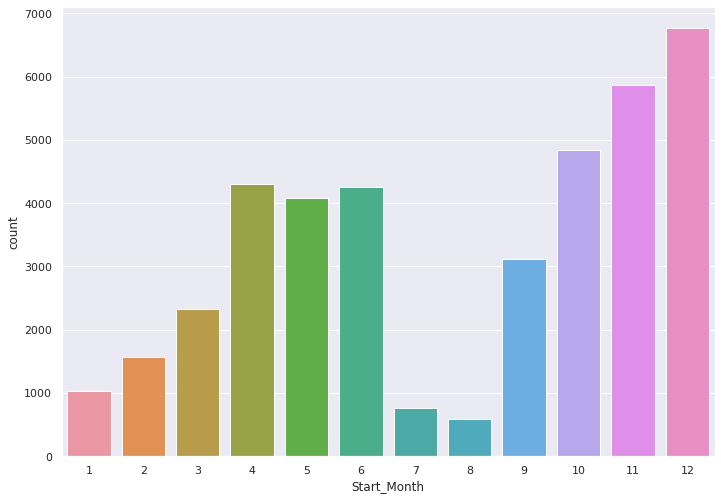

In [35]:
sns.countplot(df_accidents['Start_Month'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


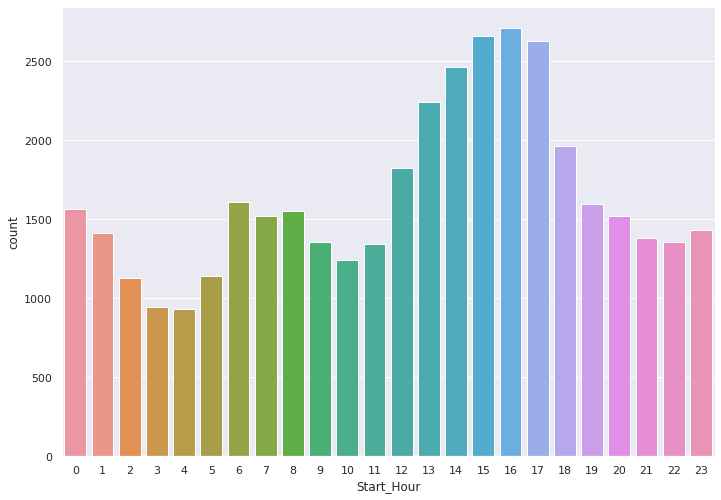

In [36]:
sns.countplot(df_accidents['Start_Hour'])